In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from termcolor import colored, cprint # used for coloring the text output.

In [52]:
def check_image_exists(image_path):
    if os.path.exists(image_path):
        return True
    else:
        print(f"Warning: Image file '{image_path}' not found.")
        return False

## Manual Implementation

In [58]:
# Input --> Compute Histogram --> Compute CDF --> Create Map --> Apply Map --> Visualize.

def histogram_equalization(img_path):
    # Step 1: Read the input image as grayscale img
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img_gray is None:
        cprint(f"Error: Could not read image from {image_path}", "red", [bold])
        return None

    height, width = img_gray.shape
    total_pixels = height * width
    cprint(f"Image Dimensions: {height}x{width}", "blue", ["bold"])
    cprint(f"Total Pixels: {total_pixels}", "blue", ["bold"])

    L = 256
    
    # Step 2: Compute the histogram of the image
    hist, _ = np.histogram(img_gray.flatten(), L, [0, L])

    # Step 3: Normalize the histogram (probability distribution)
    hist_normalized = hist / total_pixels

    # Step 4: Compute the cumulative distribution function (CDF)
    cdf = np.cumsum(hist_normalized)

    # Step 5: Map old gray levels to new gray levels using CDF
    # s = (L-1) * CDF
    new_values = np.zeros(L, dtype=int)

    for i in range(L):
        new_values[i] = int(round((L - 1) * cdf[i]))

    # Step 6: Create enhanced image with new values using vectorization
    enhanced_img = new_values[img_gray]

    return img_gray, enhanced_img, hist, cdf, new_values

In [59]:
# Display original and enhanced images with histograms, CDF and transformation func graphs

def display_results(original, enhanced, hist, cdf, new_values):
    plt.figure(figsize=(16, 8))

    # Original Image
    plt.subplot(2, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Original Histogram
    plt.subplot(2, 4, 2)
    plt.bar(range(256), hist)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    # Original CDF
    plt.subplot(2, 4, 3)
    plt.plot(range(256), cdf, 'r-')
    plt.title('Cumulative Distribution Function')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('CDF')
    plt.xlim([0, 255])
    plt.grid(True)

    # Transformation Function
    plt.subplot(2, 4, 4)
    plt.plot(range(256), new_values, 'g-')
    plt.title('Transformation Function')
    plt.xlabel('Original Intensity')
    plt.ylabel('New Intensity')
    plt.xlim([0, 255])
    plt.ylim([0, 255])
    plt.grid(True)

    # Enhanced Image
    plt.subplot(2, 4, 5)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    # Enhanced Histogram
    plt.subplot(2, 4, 6)
    enhanced_hist, _ = np.histogram(enhanced.flatten(), 256, [0, 256])
    plt.bar(range(256), enhanced_hist)
    plt.title('Enhanced Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    # Enhanced CDF
    plt.subplot(2, 4, 7)
    enhanced_cdf = np.cumsum(enhanced_hist) / np.sum(enhanced_hist)
    plt.plot(range(256), enhanced_cdf, 'r-')
    plt.title('Enhanced CDF')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('CDF')
    plt.xlim([0, 255])
    plt.grid(True)

    # Difference Image
    plt.subplot(2, 4, 8)
    diff = enhanced.astype(int) - original.astype(int)
    im_diff = plt.imshow(diff, cmap='coolwarm')
    plt.title('Difference (Enhanced - Original)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## Built-in OpenCV function

In [60]:
def using_opencv_function(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img_gray is None:
        cprint(f"Error: Could not read image from {image_path}", "red", ["bold"])
        return None

    # Using OpenCV's built-in function
    enhanced_img = cv2.equalizeHist(img_gray)

    # Display results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title('OpenCV Equalized Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.hist(enhanced_img.flatten(), 256, [0, 256])
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return enhanced_img

## Main Function

	IMAGE ENHANCEMENT USING HISTOGRAM EQUALIZATION	
Using user-provided image: public/images/tulips.png

Method 1: Manual Implementation
----------------------------------------
Image Dimensions: 512x768
Total Pixels: 393216


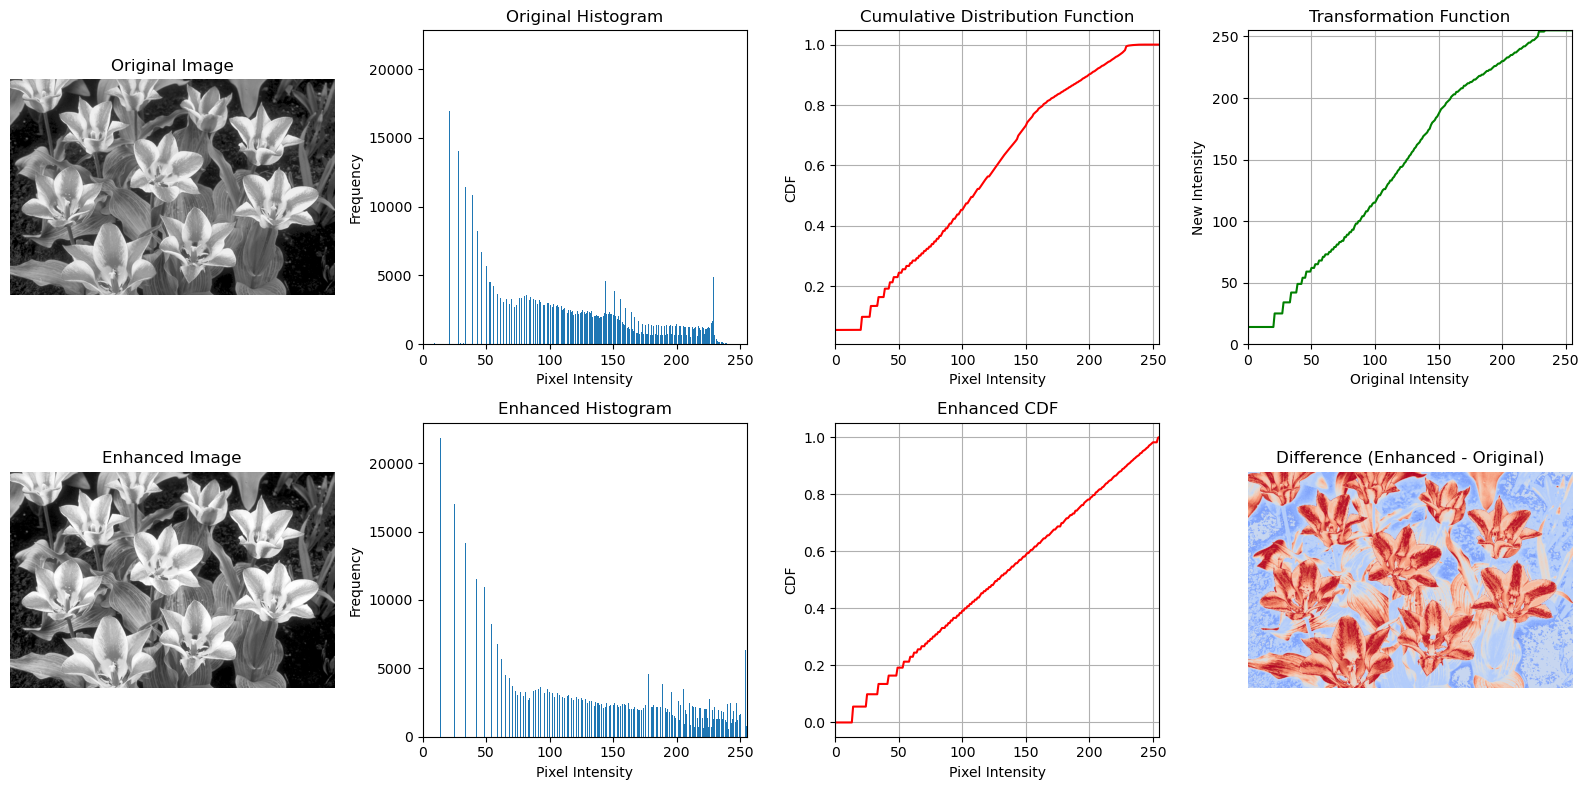


+------ Original Image Statistics ------+
  Min intensity: 0
  Max intensity: 244
  Mean intensity: 108.26
  Standard deviation: 63.29

+------ Enhanced Image Statistics ------+
  Min intensity: 14
  Max intensity: 255
  Mean intensity: 129.19
  Standard deviation: 72.19

	Enhanced image saved as 'enhanced_image.jpg' at 'public/images/'	


Method 2: Using OpenCV Built-in Function
----------------------------------------


C:\Users\vedan\AppData\Local\Temp\ipykernel_11796\4230180540.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(enhanced_img.flatten(), 256, [0, 256])


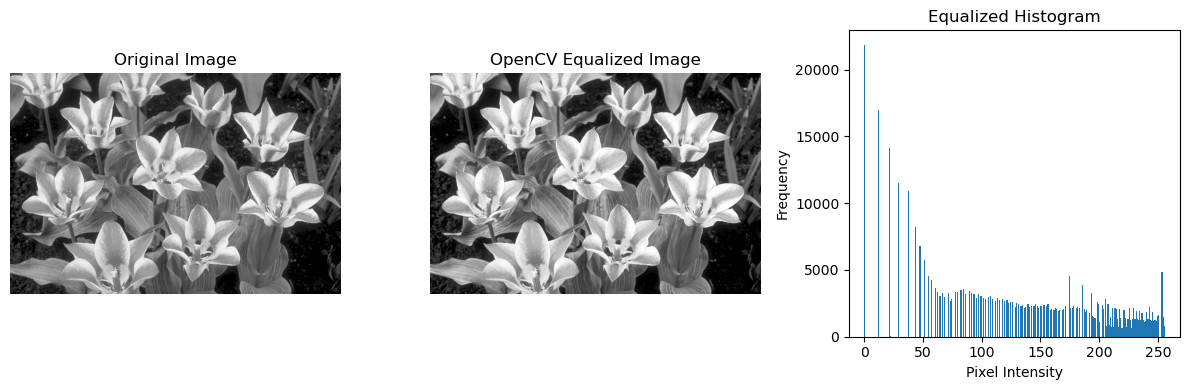


	Experiment completed successfully!	


In [61]:
def main():
    cprint("=" * 60, "cyan", ["bold"])
    cprint("\tIMAGE ENHANCEMENT USING HISTOGRAM EQUALIZATION\t", "yellow", ["bold"])
    cprint("=" * 60, "cyan", ["bold"])

    image_path = "public/images/tulips.png" # Initialize image_path
    
    if check_image_exists(image_path):
        cprint(f"Using user-provided image: {image_path}", "green", ["bold"])
    else:
        if image_path is None:
            possible_paths = ['public/images/input_image.jpg', 'public/images/sample_low_contrast.jpg']
            for path in possible_paths:
                if os.path.exists(path):
                    image_path = path
                    cprint(f"Using image: {image_path}", "green", ["bold"])
                    break

    cprint("\nMethod 1: Manual Implementation", "yellow", ["bold"])
    cprint("-" * 40, "cyan", ["bold"])

    # Manual implementation
    result = histogram_equalization(image_path)

    if result is not None:
        original, enhanced, hist, cdf, new_values = result

        # Display results
        display_results(original, enhanced, hist, cdf, new_values)

        # Calculate and print statistics
        cprint(f"\n+------ Original Image Statistics ------+", "magenta", ["bold"])
        cprint(f"  Min intensity: {np.min(original)}", "blue", ["bold"])
        cprint(f"  Max intensity: {np.max(original)}", "blue", ["bold"])
        cprint(f"  Mean intensity: {np.mean(original):.2f}", "blue", ["bold"])
        cprint(f"  Standard deviation: {np.std(original):.2f}", "blue", ["bold"])

        cprint(f"\n+------ Enhanced Image Statistics ------+", "magenta", ["bold"])
        cprint(f"  Min intensity: {np.min(enhanced)}", "blue", ["bold"])
        cprint(f"  Max intensity: {np.max(enhanced)}", "blue", ["bold"])
        cprint(f"  Mean intensity: {np.mean(enhanced):.2f}", "blue", ["bold"])
        cprint(f"  Standard deviation: {np.std(enhanced):.2f}", "blue", ["bold"])

        # Save the enhanced image
        cv2.imwrite('public/images/enhanced_image.jpg', enhanced)
        cprint(f"\n\tEnhanced image saved as 'enhanced_image.jpg' at 'public/images/'\t", "green", "on_light_grey", ["bold"])
    else:
        cprint("Failed to process image.", "red", "on_light_grey", ["bold"])
        return

    cprint("\n" + "=" * 60,  "cyan", ["bold"])
    cprint("\nMethod 2: Using OpenCV Built-in Function", "yellow", ["bold"])
    cprint("-" * 40, "cyan", ["bold"])

    # Using OpenCV built-in function
    cv2_result = using_opencv_function(image_path)

    if cv2_result is not None:
        cprint("\n" + "=" * 60, "cyan", ["bold"])
        cprint("\tExperiment completed successfully!\t", "green", "on_light_grey", ["bold"])
        cprint("=" * 60, "cyan", ["bold"])
    else:
        cprint("Failed to process image with OpenCV.", "red", "on_light_grey", ["bold"])

if __name__ == "__main__":
    # Run the main function
    main()